<a href="https://colab.research.google.com/github/4lanvgz/Projects/blob/main/clusterai_Alan_Villegas_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [456]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [457]:
# Definimos el identificador de la hoja de cálculo de Google Sheets
Id_planilla = '1lJuHZIl-8iYOoi5cfYmnVoQq-RBl_2Yu2XIsqsjOvQA'

# Construimos la URL para acceder a la hoja de cálculo en formato CSV
URL = f'https://docs.google.com/spreadsheets/d/{Id_planilla}/gviz/tq?tqx=out:csv&sheet='

#Obtener los datos

df_TC = pd.read_csv(URL + 'Hoja')

In [458]:
#Obtener el tamaño de cada dimensión
df_TC.shape

(7043, 22)

In [459]:
#Obtener el número total de elementos
df_TC.size

154946

In [460]:
#Pantallazo general para los no nulos, tipos y columnas
df_TC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            6127 non-null   object 
 3   SeniorCitizen     6127 non-null   float64
 4   Partner           6127 non-null   object 
 5   Dependents        6127 non-null   object 
 6   tenure            6127 non-null   float64
 7   PhoneService      6127 non-null   object 
 8   MultipleLines     6127 non-null   object 
 9   InternetService   6127 non-null   object 
 10  OnlineSecurity    6127 non-null   object 
 11  OnlineBackup      6127 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          5846 non-null   object 


In [461]:
#Distribucion de la variable Churn
df_TC['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [462]:
# Verificar los valores únicos en Churn
print(df_TC['Churn'].unique())

['No' 'Yes']


In [463]:
# Limpiar la columna Churn y convertir a formato numérico
df_TC['Churn'] = df_TC['Churn'].str.strip()  # Eliminar espacios en blanco
df_TC['Churn'] = df_TC['Churn'].map({'Yes': 1, 'No': 0})

In [464]:
# Reemplazar cadenas vacías o espacios por NaN
df_TC['Churn'].replace('', pd.NA, inplace=True)
df_TC['Churn'].replace(' ', pd.NA, inplace=True)

<ipython-input-464-dc90d0400b7e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_TC['Churn'].replace('', pd.NA, inplace=True)
<ipython-input-464-dc90d0400b7e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [465]:
#Ver que los valores sean 0 y 1
print(df_TC['Churn'].unique())

[0 1]


In [466]:
# Verificar si hay NaNs después del mapeo
print("NaNs en Churn después del mapeo:")
print(df_TC['Churn'].isnull().sum())

NaNs en Churn después del mapeo:
0


In [467]:
#Que tipo
print(df_TC['Churn'].dtype)

int64


In [468]:
#Verificar duplicados
df_TC.duplicated().sum()

0

In [469]:
#Eliminar Columna unnamed: 0 ya que no es necesario para el analisis
df_TC.drop('Unnamed: 0', axis=1, inplace=True)

In [470]:
# Comprobar valores nulos por columna
print(df_TC.isnull().sum())

customerID             0
gender               916
SeniorCitizen        916
Partner              916
Dependents           916
tenure               916
PhoneService         916
MultipleLines        916
InternetService      916
OnlineSecurity       916
OnlineBackup         916
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract            1197
PaperlessBilling    1197
PaymentMethod       1197
MonthlyCharges      1197
TotalCharges          11
Churn                  0
dtype: int64


In [471]:
#Contador de Nans
df_TC.isna().sum()

,0
customerID,0
gender,916
SeniorCitizen,916
Partner,916
Dependents,916
tenure,916
PhoneService,916
MultipleLines,916
InternetService,916
OnlineSecurity,916


In [472]:
#Obtener el tamaño de cada dimensión
df_TC.shape

(7043, 21)

In [473]:
# Separar características y etiqueta después de limpiar
X = df_TC.drop(columns=['Churn', 'customerID'])
y = df_TC['Churn']

In [474]:
# Codificación de variables categóricas
X = pd.get_dummies(X, drop_first=True)  # Convierte variables categóricas a variables dummy

In [475]:
# Verificar si hay NaNs en y
print("NaNs en y (Churn):")
print(y.isnull().sum())

NaNs en y (Churn):
0


In [476]:
# Verificar si hay NaNs después del mapeo
print("NaNs en Churn después del mapeo:")
print(df_TC['Churn'].isnull().sum())

NaNs en Churn después del mapeo:
0


In [477]:
# Imputar valores nulos en X si existen
imputer = SimpleImputer(strategy='mean')  # Para columnas numéricas
X_imputed = imputer.fit_transform(X)

# Convertir X_imputed a DataFrame nuevamente para mantener las columnas originales
X = pd.DataFrame(X_imputed, columns=X.columns)

In [478]:
# Verificar si hay NaNs en y
print("NaNs en y (Churn):")
print(y.isnull().sum())

NaNs en y (Churn):
0


# PipeLine ML

In [479]:
#Importo las columnas con las cuales voy a trabajar para el pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para rebalancear el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Definir y ajustar un modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Definir parámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(rf_model, param_grid, scoring='f1', cv=3)
grid_search.fit(X_train_scaled, y_train_resampled)

best_model = grid_search.best_estimator_

# Realizar predicciones sobre el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)

# Evaluar el modelo mejorado
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))
print("\nAUC-ROC:", roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1]))

Matriz de Confusión:
[[894 142]
 [133 240]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1036
           1       0.63      0.64      0.64       373

    accuracy                           0.80      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.81      0.80      0.81      1409


AUC-ROC: 0.8554167917438695


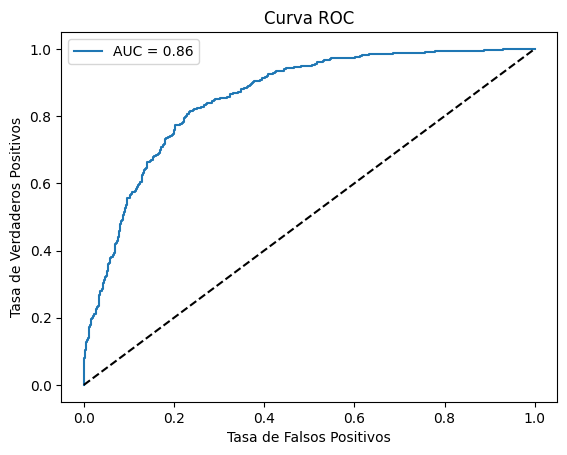

In [480]:
# Graficar la curva ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [481]:
# Definir y ajustar un modelo SVM
svm_model = SVC(probability=True, random_state=42)  # Asegúrate de habilitar la probabilidad para calcular AUC-ROC

# Definir parámetros para GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Parámetro de regularización
    'gamma': ['scale', 'auto', 0.01, 0.1],  # Parámetro del kernel RBF
    'kernel': ['linear', 'rbf']  # Puedes probar diferentes kernels
}

grid_search = GridSearchCV(svm_model, param_grid, scoring='f1', cv=3)
grid_search.fit(X_train_scaled, y_train_resampled)

best_model_svm = grid_search.best_estimator_

# Realizar predicciones sobre el conjunto de prueba
y_pred_svm = best_model_svm.predict(X_test_scaled)

# Evaluar el modelo mejorado
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_svm))
print("\nAUC-ROC:", roc_auc_score(y_test, best_model_svm.predict_proba(X_test_scaled)[:, 1]))

Matriz de Confusión:
[[881 155]
 [182 191]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.55      0.51      0.53       373

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.69      1409
weighted avg       0.76      0.76      0.76      1409


AUC-ROC: 0.7675970685354064


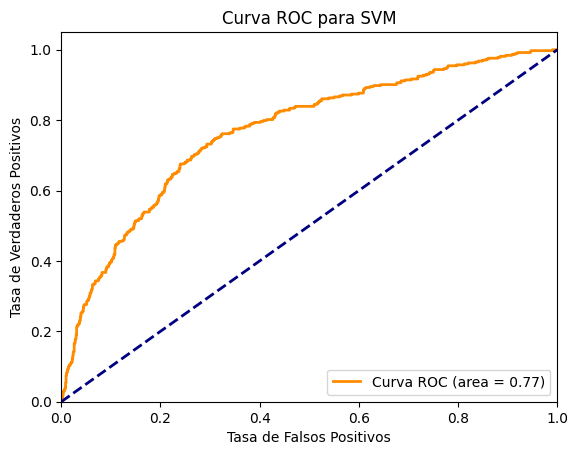

In [484]:
from sklearn.metrics import roc_curve, auc
# Calcular las probabilidades para la clase positiva
y_prob_svm = best_model_svm.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para SVM')
plt.legend(loc="lower right")
plt.show()

In [485]:
from sklearn.ensemble import GradientBoostingClassifier

# Definir el modelo
gb_model = GradientBoostingClassifier()

# Ajustar el modelo
gb_model.fit(X_train_scaled, y_train_resampled)

# Realizar predicciones
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de Confusión (Gradient Boosting):")
print(confusion_matrix(y_test, y_pred_gb))
print("\nInforme de Clasificación (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))
print("\nAUC-ROC (Gradient Boosting):", roc_auc_score(y_test, gb_model.predict_proba(X_test_scaled)[:, 1]))

Matriz de Confusión (Gradient Boosting):
[[914 122]
 [150 223]]

Informe de Clasificación (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1036
           1       0.65      0.60      0.62       373

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.75      1409
weighted avg       0.80      0.81      0.80      1409


AUC-ROC (Gradient Boosting): 0.856109029366402


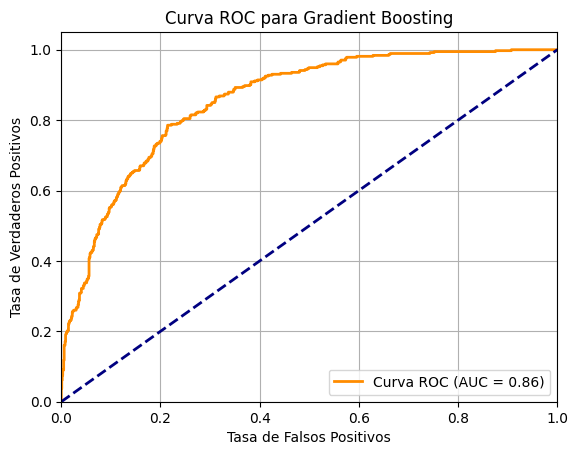

In [493]:
# Calcular las probabilidades para la clase positiva
y_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)

# Calcular el AUC
auc_gb = roc_auc_score(y_test, y_prob_gb)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(auc_gb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Gradient Boosting')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [486]:
import xgboost as xgb

# Definir el modelo
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Ajustar el modelo
xgb_model.fit(X_train_scaled, y_train_resampled)

# Realizar predicciones
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de Confusión (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nInforme de Clasificación (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
print("\nAUC-ROC (XGBoost):", roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1]))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:32:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Matriz de Confusión (XGBoost):
[[917 119]
 [184 189]]

Informe de Clasificación (XGBoost):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.61      0.51      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409


AUC-ROC (XGBoost): 0.8272834784228886



AUC-ROC (XGBoost): 0.8272834784228886


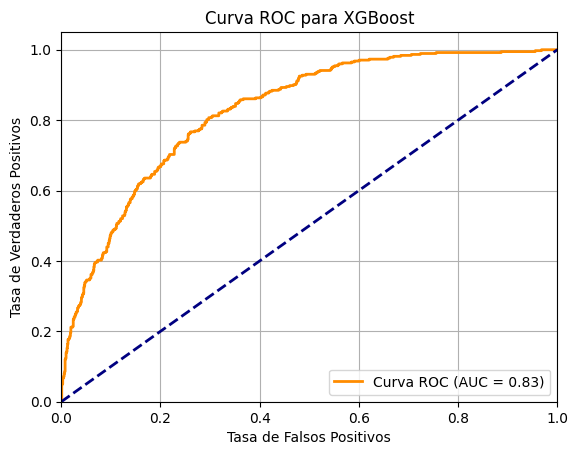

In [494]:
# Calcular AUC-ROC
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print("\nAUC-ROC (XGBoost):", auc_xgb)

# Calcular la curva ROC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para XGBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [487]:
from keras.models import Sequential
from keras.layers import Dense

# Definir el modelo
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ajustar el modelo
nn_model.fit(X_train_scaled, y_train_resampled, epochs=50, batch_size=32)

# Realizar predicciones
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluar el modelo
print("Matriz de Confusión (Redes Neuronales):")
print(confusion_matrix(y_test, y_pred_nn))
print("\nInforme de Clasificación (Redes Neuronales):")
print(classification_report(y_test, y_pred_nn))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7371 - loss: 0.5365
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7702 - loss: 0.4780
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7921 - loss: 0.4475
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8092 - loss: 0.4307
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8052 - loss: 0.4298
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8183 - loss: 0.4046
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8303 - loss: 0.3845
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8386 - loss: 0.3675
Epoch 9/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8407 - loss: 0.3654
Epoch 10/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8489 - loss: 0.3440
Epoch 11/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8493 - loss: 0.3400
Epoch 12/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

In [488]:
from sklearn.metrics import roc_auc_score

# Calcular las probabilidades para la clase positiva
y_prob_nn = nn_model.predict(X_test_scaled)

# Calcular AUC-ROC
auc_nn = roc_auc_score(y_test, y_prob_nn)

print("\nAUC-ROC (Redes Neuronales):", auc_nn)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

AUC-ROC (Redes Neuronales): 0.782746074301034


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

AUC-ROC (Redes Neuronales): 0.782746074301034


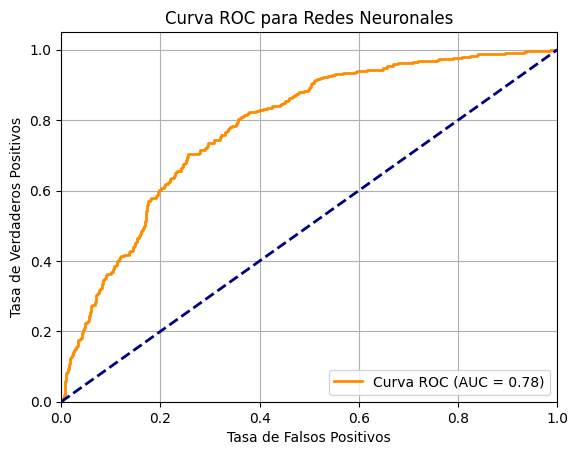

In [495]:
# Calcular las probabilidades para la clase positiva
y_prob_nn = nn_model.predict(X_test_scaled)

# Calcular AUC-ROC
auc_nn = roc_auc_score(y_test, y_prob_nn)
print("\nAUC-ROC (Redes Neuronales):", auc_nn)

# Calcular la curva ROC
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_prob_nn)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(auc_nn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Redes Neuronales')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Conclusiones


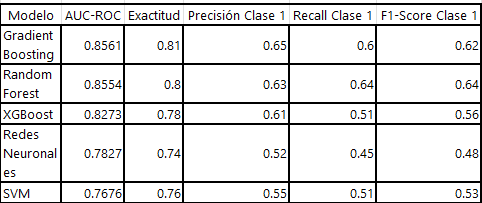

Con base en estos resultados, podemos afirmar que hay una probabilidad significativa de que algunos clientes se vayan de la compañía, especialmente aquellos identificados como "en riesgo" por los modelos de Gradient Boosting y Random Forest, que son los más precisos en esta tarea.
Por ejemplo, el modelo de Gradient Boosting tiene un recall del 60% para la clase positiva (clientes que se irán), lo que significa que puede identificar correctamente el 60% de los clientes que realmente abandonarán.
Además, la precisión del modelo indica que el 65% de los clientes identificados como "en riesgo" efectivamente se irán.
